In [164]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearregression import * # Import my implemtation of Linear Regression
sns.set_theme()

 Let us generate data using  this
linear function for our model test, our model will try to estimate the weights and bias term
of this function, this function has 3 features so our weights will be 3 plus 1 bias term. Our function is truly linear, however it should be noted that in real world application you can hardly see any relationship that is wholely linear. But we will simulate data using this function, our function says: "I will generate dataset using some coefficients and intercept, please find those coefficients and intercept that I used to generate the dataset."

In [165]:
f = lambda x1, x2, x3: 7*x1 + 2*x2 - 5*x3 + 3

In [166]:
#Generate the training data using our function
np.random.seed(42)
X = np.random.randint(1, 100, size=(1_000, 3))
Y = f(X[:,0], X[:,1], X[:,2])
Y = Y[:, np.newaxis]
print(X[:5])
print(Y[:5])

[[52 93 15]
 [72 61 21]
 [83 87 75]
 [75 88 24]
 [ 3 22 53]]
[[ 478]
 [ 524]
 [ 383]
 [ 584]
 [-197]]


In [167]:
X.shape

(1000, 3)

In [168]:
Y.shape

(1000, 1)

In [169]:
#Generate test data using our function
X_test = np.random.random(size=(50, 3))
Y_true = f(X_test[:,0], X_test[:,1], X_test[:,2])
Y_true = Y_true[:, np.newaxis]

In [170]:
X_test.shape

(50, 3)

In [171]:
Y_true.shape

(50, 1)

In [172]:
W = np.random.random(size=(X.shape[1], 1))
b = 0.0

In [173]:
print(W)

[[0.39072837]
 [0.79834419]
 [0.37193267]]


In [174]:
linear_regression = LinearRegression()

In [175]:
W, b, J_histories, W_histories, b_histories, iterations = linear_regression.fit(X, Y, W, b,
    optimizer='rms',learning_rate=1e-4, epochs=1, batch_size=1, num_iters=100000, bias=True)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 40125.45138031   
Iteration 10000: Cost 25238.15116149   
Iteration 20000: Cost 15719.03421780   
Iteration 30000: Cost 9332.97324666   
Iteration 40000: Cost 4642.68960545   
Iteration 50000: Cost 1647.80493157   
Iteration 60000: Cost 234.74401186   
Iteration 70000: Cost 0.53231292   
Iteration 80000: Cost 0.26554306   
Iteration 90000: Cost 0.10140816   
Iteration 99999: Cost 0.03981805   


Let us view the weights (coefficients) that our model predicted, we can see that it has nearly accurately computed the weights and
bias (intercept).

In [176]:
W

array([[ 6.99916795],
       [ 1.99919199],
       [-5.00077977]])

In [177]:
b

array([3.12411587])

In [178]:
predictions = linear_regression.predict(X_test, W, b)

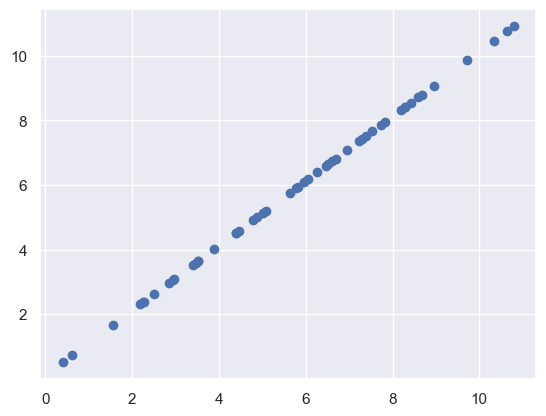

In [179]:
plt.scatter(Y_true, predictions);

In [180]:
W_histories = np.array(W_histories)
W_histories.shape

(1, 11, 3)

In [181]:
J_histories = np.array(J_histories)
J_histories.shape

(1, 11)

In [182]:
b_histories = np.array(b_histories)
b_histories.shape

(1, 11, 1)

In [183]:
jh = J_histories.ravel()
jh

array([4.01254514e+04, 2.52381512e+04, 1.57190342e+04, 9.33297325e+03,
       4.64268961e+03, 1.64780493e+03, 2.34744012e+02, 5.32312918e-01,
       2.65543060e-01, 1.01408159e-01, 3.98180499e-02])

In [184]:
bh = np.ravel(b_histories)
bh

array([3.16227766e-08, 9.78493404e-01, 1.97715134e+00, 2.97707891e+00,
       3.97700001e+00, 4.97691272e+00, 5.97614850e+00, 6.09994763e+00,
       5.10073076e+00, 4.10252648e+00, 3.12411587e+00])

In [185]:
iterations = np.array(iterations)
iterations

array([    0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,
       90000, 99999])

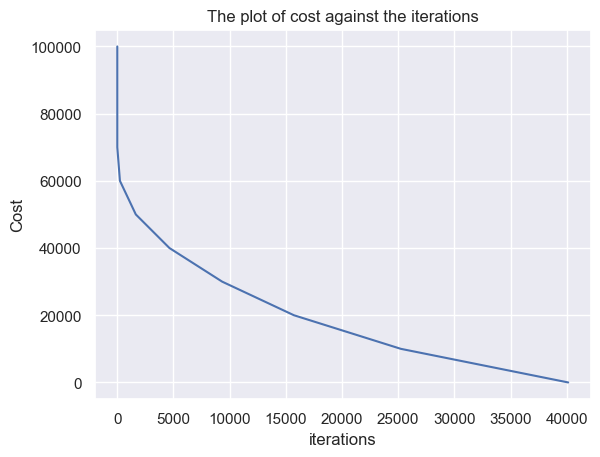

In [189]:
plt.plot(jh, iterations)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();